We load the libraries to be used in the experimentation

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import f_oneway, ttest_ind, shapiro
import scipy.stats as ss
import scikit_posthocs as sp

Continue loading the data of the populations to be tested:

Example using 10 independent runs (not available with all models)

In [14]:
data_arch2 = [
    # ['max', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    # ['avg', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    ['g_prod', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711, 0.8753, 0.8744, 0.8727, 0.8798, 0.8789],
    ['g_ob', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697, 0.872, 0.8813, 0.8758, 0.8719, 0.8762],
    # ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    ['gp_prod_p_0_25', 0.8796, 0.8838, 0.8825, 0.882, 0.8784, 0.8819, 0.8821, 0.8796, 0.8828, 0.8763],
    # ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    ['gp_comb_maxAndOB', 0.873, 0.8719, 0.8682, 0.8691, 0.8698, 0.8697, 0.8697, 0.8742, 0.8682, 0.8768],
    ['gp_comb_maxAndProd', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716, 0.8781, 0.8688, 0.8732, 0.873, 0.8717],
    ['gp_comb_maxProdAndOB', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713, 0.8714, 0.8734, 0.8739, 0.8755, 0.876],
    ['gp_comb_prodAndOB', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797, 0.873, 0.8685, 0.8741, 0.873, 0.8715],
    ['gp_comp_max_prodAndOB', 0.88, 0.8735, 0.872, 0.8729, 0.8782, 0.8735, 0.8784, 0.8783, 0.8798, 0.8772],
    ['gp_comp_ob_maxandProd', 0.8732, 0.877, 0.8754, 0.8728, 0.8741, 0.8782, 0.8693, 0.8761, 0.8735, 0.8773],
    ['gp_comp_prod_maxAndOB', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754, 0.8717, 0.8747, 0.8675, 0.8652, 0.8767],
    ['gp_comp_prod_maxAndProd', 0.8747, 0.8779, 0.8774, 0.875, 0.8728, 0.8753, 0.8762, 0.8759, 0.8788, 0.8764],
    ['gp_comp_prod_prodAndOB', 0.8741, 0.874, 0.879, 0.8756, 0.8749, 0.8695, 0.8763, 0.876, 0.8802, 0.8756]
]

data_values = [values[1:] for values in data_arch2]
df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df = df.set_index('Model')
print(len(data_values[0]))

10


## Architecture 1: LeNet-5

In [99]:
data_arch1 = [
    [r'$AM$', 0.7487, 0.7580, 0.7562, 0.7452, 0.7562],
    [r'$G_{max}^{a,b}$', 0.7415, 0.7421, 0.7396, 0.7423, 0.7420],
    [r'$G_{prod}^{a,b}$', 0.7554, 0.7577, 0.7470, 0.7535, 0.7515],
    [r'$G_{ob}$', 0.7559, 0.7583, 0.7497, 0.7582, 0.7552],
    [r'$G_{geom}$', 0.7486, 0.7563, 0.7580, 0.7544, 0.7535],
    [r'$G_{u}$', 0.7407, 0.7451, 0.7416, 0.7491, 0.7439],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7561, 0.7587, 0.7558, 0.7572, 0.7535],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7486, 0.7528, 0.7468, 0.7496, 0.7509],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7462, 0.7435, 0.7409, 0.7568, 0.7414],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7523, 0.7551, 0.755, 0.7548, 0.7537],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.755, 0.7558, 0.7585, 0.7542, 0.7622],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7579, 0.7581, 0.7535, 0.7605, 0.7565],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7496, 0.7516, 0.7511, 0.7462, 0.758],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7583, 0.7515, 0.7448, 0.7546, 0.7533],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7607, 0.7488, 0.7538, 0.7517, 0.7556],

    [r'$G_{max}^{* a, b}$', 0.7360, 0.7357, 0.7414, 0.7303, 0.7387],
    [r'$G_{prod}^{* a, b}$', 0.7557, 0.7548, 0.7588, 0.7573, 0.7506],
    [r'$G_{geom}^{* a, b}$', 0.7534, 0.7466, 0.7605, 0.6547, 0.7502],

    [r'$AW_{(Avg, G_{max}^{a, b})}^{a, b}$', 0.7573, 0.7549, 0.7567, 0.7661, 0.7594],
    [r'$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$', 0.7674, 0.7591, 0.7628, 0.7670, 0.7630],
    [r'$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$', 0.7610, 0.7597, 0.7565, 0.7587, 0.7581],
]

data_values = [values[1:] for values in data_arch1]
df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')
df

,Test1,Test2,Test3,Test4,Test5
Model,,,,,
$AM$,0.7487,0.7580,0.7562,0.7452,0.7562
"$G_{max}^{a,b}$",0.7415,0.7421,0.7396,0.7423,0.7420
"$G_{prod}^{a,b}$",0.7554,0.7577,0.7470,0.7535,0.7515
$G_{ob}$,0.7559,0.7583,0.7497,0.7582,0.7552
$G_{geom}$,0.7486,0.7563,0.7580,0.7544,0.7535
$G_{u}$,0.7407,0.7451,0.7416,0.7491,0.7439
"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7561,0.7587,0.7558,0.7572,0.7535
"$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.7486,0.7528,0.7468,0.7496,0.7509
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7462,0.7435,0.7409,0.7568,0.7414


ANOVA test: Check if all populations are equal among themselves:

In [95]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=2.7453725193626624, pvalue=0.0006880317497493617)


Anderson posthoc: Check differences among populations:

In [100]:
data_values_np = np.array(data_values)
posthoc_df = sp.posthoc_anderson(data_values_np)
posthoc_df = posthoc_df.set_axis([row[0] for row in data_arch1], axis=1, inplace=False)
posthoc_df = posthoc_df.set_axis([row[0] for row in data_arch1], axis=0, inplace=False)
posthoc_df

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,1.000000,0.003769,0.250000,0.250000,0.250000,0.018018,0.250000,0.219282,0.121981,0.140970,...,0.138963,0.250000,0.250000,0.250000,0.003769,0.250000,0.250000,0.138963,0.003715,0.008781
2,0.003769,1.000000,0.004356,0.004356,0.004356,0.250000,0.004356,0.004356,0.250000,0.004356,...,0.004356,0.004356,0.004356,0.004356,0.010368,0.004356,0.056741,0.004356,0.004356,0.004356
3,0.250000,0.004356,1.000000,0.250000,0.250000,0.010368,0.158821,0.121731,0.056741,0.250000,...,0.056541,0.250000,0.250000,0.250000,0.004356,0.250000,0.250000,0.079028,0.004356,0.010368
4,0.250000,0.004356,0.250000,1.000000,0.250000,0.004356,0.250000,0.021065,0.037320,0.056741,...,0.250000,0.144634,0.250000,0.250000,0.004356,0.250000,0.225078,0.250000,0.004356,0.070584
5,0.250000,0.004356,0.250000,0.250000,1.000000,0.010368,0.250000,0.047020,0.056741,0.250000,...,0.184588,0.250000,0.250000,0.250000,0.004356,0.250000,0.225078,0.079028,0.004356,0.010368
6,0.018018,0.250000,0.010368,0.004356,0.010368,1.000000,0.004356,0.021065,0.250000,0.004356,...,0.004356,0.010368,0.021065,0.010368,0.010368,0.004356,0.121731,0.004356,0.004356,0.004356
7,0.250000,0.004356,0.158821,0.250000,0.250000,0.004356,1.000000,0.004356,0.037320,0.056741,...,0.250000,0.056741,0.121731,0.225078,0.004356,0.250000,0.056741,0.250000,0.004356,0.056541
8,0.219282,0.004356,0.121731,0.021065,0.047020,0.021065,0.004356,1.000000,0.056741,0.010368,...,0.004356,0.250000,0.121731,0.079028,0.004356,0.021065,0.250000,0.004356,0.004356,0.004356
9,0.121981,0.250000,0.056741,0.037320,0.056741,0.250000,0.037320,0.056741,1.000000,0.056741,...,0.021065,0.074927,0.121731,0.056741,0.013420,0.037320,0.250000,0.021065,0.004356,0.010368
10,0.140970,0.004356,0.250000,0.056741,0.250000,0.004356,0.056741,0.010368,0.056741,1.000000,...,0.056741,0.056741,0.250000,0.250000,0.004356,0.232402,0.121731,0.021065,0.004356,0.004356


Plot statistical significance:

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7fd04564f070>)

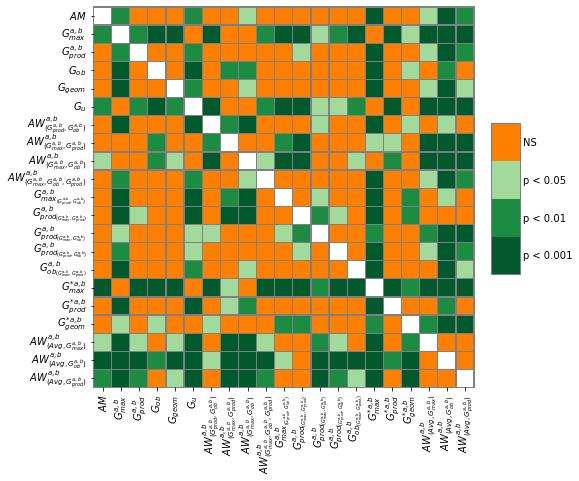

In [83]:
pc = sp.posthoc_conover(data_values_np)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch1], 'yticklabels': [row[0] for row in data_arch1]}
sp.sign_plot(pc, **heatmap_args)

## Architecture 2: Network in Network

In [84]:
data_arch2 = [
    [r'$AM$', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    [r'$G_{max}^{a,b}$', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    [r'$G_{prod}^{a,b}$', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711],
    [r'$G_{ob}$', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697],
    [r'$G_{geom}$', 0.8671, 0.8674, 0.8692, 0.8671, 0.8634],
    [r'$G_{u}$', 0.8613, 0.8646, 0.8656, 0.8587, 0.8665],
    # ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    # ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.873, 0.8719, 0.8682, 0.8691, 0.8698],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.88, 0.8735, 0.872, 0.8729, 0.8782],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8747, 0.8779, 0.8774, 0.875, 0.8728],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8741, 0.874, 0.879, 0.8756, 0.8749],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8732, 0.877, 0.8754, 0.8728, 0.8741],

    [r'$G_{max}^{* a, b}$', 0.8701, 0.8722, 0.868, 0.8674, 0.8681],
    [r'$G_{prod}^{* a, b}$', 0.8796, 0.8838, 0.8825, 0.882, 0.8784],
    [r'$G_{geom}^{* a, b}$', 0.8757, 0.8774, 0.8784, 0.8757, 0.8799],
]

data_values = [values[1:] for values in data_arch2]
df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

We start by testing for normality in each population:

In [85]:
for pop in data_arch2:
    test_result = ss.shapiro(pop[1:])
    print('Shapiro test result for grouping {}: {}'.format(pop[0], test_result))
    if (test_result[1] > 0.05):
        print('We cannot discard that the previous population was sampled from a normal distribution')

Shapiro test result for grouping $AM$: ShapiroResult(statistic=0.9580554366111755, pvalue=0.7943816781044006)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{max}^{a,b}$: ShapiroResult(statistic=0.9860615730285645, pvalue=0.9641755223274231)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{prod}^{a,b}$: ShapiroResult(statistic=0.9100196361541748, pvalue=0.4677083194255829)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{ob}$: ShapiroResult(statistic=0.8831984996795654, pvalue=0.32405728101730347)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{geom}$: ShapiroResult(statistic=0.8639872074127197, pvalue=0.24292078614234924)
We cannot discard that the previous population was sampled from a norma

All populations seem to be normal, so we apply statistical tests that allow for normality. We now will perform ANOVA testing in all populations to check if there are statistical differences among them:

<font color='red'>Warning</font>: Populations are very small (n = 5, n < 20), so populations may not really be normal. Further experimenting could be necessary.

In [86]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=18.684840907406233, pvalue=6.897871382598299e-20)


The p-value obtained is well beyond the imposed threshold of 0.05, so we can safely discard the null hypothesis that all populations are equal (and thus, there must be some model whose accuracies are statistically better or worse than those of the rest). 

We now need to find out which models are statistically different via post-hoc tests between each pair of tests.

In [87]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.000000,0.250000,0.004356,0.004356,0.017740,0.250000,0.003715,0.003572,0.004356,0.003572,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.003572
2,0.250000,1.000000,0.004356,0.004356,0.116989,0.250000,0.003715,0.003572,0.005658,0.003572,0.004356,0.004356,0.004356,0.004356,0.004356,0.037320,0.004356,0.003572
3,0.004356,0.004356,1.000000,0.250000,0.003769,0.004356,0.008781,0.173200,0.070584,0.250000,0.250000,0.102649,0.250000,0.037320,0.250000,0.021065,0.004356,0.003572
4,0.004356,0.004356,0.250000,1.000000,0.003769,0.004356,0.054596,0.250000,0.037320,0.250000,0.250000,0.250000,0.250000,0.056741,0.250000,0.021065,0.021065,0.051813
5,0.017740,0.116989,0.003769,0.003769,1.000000,0.031294,0.003218,0.003095,0.018018,0.003095,0.003769,0.003769,0.003769,0.003769,0.003769,0.041709,0.003769,0.003095
6,0.250000,0.250000,0.004356,0.004356,0.031294,1.000000,0.003715,0.003572,0.004356,0.003572,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.003572
7,0.003715,0.003715,0.008781,0.054596,0.003218,0.003715,1.000000,0.250000,0.003715,0.025232,0.250000,0.250000,0.138963,0.138963,0.076000,0.003715,0.059879,0.250000
8,0.003572,0.003572,0.173200,0.250000,0.003095,0.003572,0.250000,1.000000,0.069525,0.137062,0.250000,0.172738,0.250000,0.250000,0.132286,0.019308,0.062981,0.250000
9,0.004356,0.005658,0.070584,0.037320,0.018018,0.004356,0.003715,0.069525,1.000000,0.069525,0.021065,0.010368,0.026977,0.004356,0.010368,0.250000,0.004356,0.003572
10,0.003572,0.003572,0.250000,0.250000,0.003095,0.003572,0.025232,0.137062,0.069525,1.000000,0.250000,0.245070,0.250000,0.250000,0.250000,0.019308,0.003571,0.055472


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7fd045f79be0>)

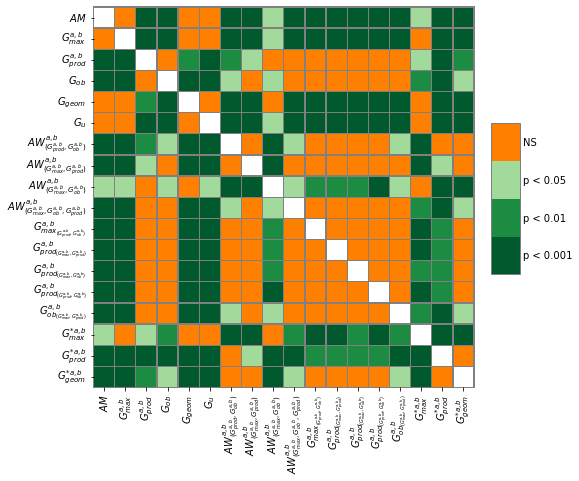

In [88]:
pc = sp.posthoc_conover(data_values_np)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch2], 'yticklabels': [row[0] for row in data_arch2]}
sp.sign_plot(pc, **heatmap_args)

## Architecture 3: VGG (Small version)

In [ ]:
data_arch3 = [
    [r'$AM$', ],
    [r'$G_{max}^{a,b}$', ],
    [r'$G_{prod}^{a,b}$', ],
    [r'$G_{ob}$', ],
    [r'$G_{geom}$', ],
    [r'$G_{u}$', ],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', ],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', ],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', ],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', ],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', ],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', ],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', ],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', ],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', ],

    [r'$G_{max}^{* a, b}$', ],
    [r'$G_{prod}^{* a, b}$', ],
    [r'$G_{geom}^{* a, b}$', ],
]

data_values = [values[1:] for values in data_arch3]
df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

ANOVA test: Check if all populations are equal among themselves:

In [ ]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

Anderson posthoc: Check differences among populations:

In [ ]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)

Plot statistical significance: